In [2]:
! pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 9.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 5.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 8.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 11.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
! pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 10.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
! pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 10.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 12.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.0/311.0 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 11.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [5]:
import pandas as pd

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [6]:
silver_path = "/src//tests/resources/data/output/silver"

In [7]:
silver_df = pd.read_parquet(silver_path)

In [8]:
silver_df

,timestamp,turbine_id,wind_speed,wind_direction,power_output,min_power_output,max_power_output,avg_power_output,std_power_output,anomaly_flag_power_output,imputed_flag_power_output,date
0,2022-03-01 08:00:00,1,12.6,150,1.6,1.6,4.4,2.975000,0.920893,False,False,2022-03-01
1,2022-03-01 01:00:00,1,11.6,152,4.4,1.6,4.4,2.975000,0.920893,False,False,2022-03-01
2,2022-03-01 15:00:00,1,9.7,135,2.9,1.6,4.4,2.975000,0.920893,False,False,2022-03-01
3,2022-03-01 05:00:00,1,12.4,116,2.2,1.6,4.4,2.975000,0.920893,False,False,2022-03-01
4,2022-03-01 16:00:00,1,12.4,289,2.3,1.6,4.4,2.975000,0.920893,False,False,2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
11140,2022-03-31 13:00:00,15,10.3,322,3.0,1.7,4.4,2.916667,0.820746,False,False,2022-03-31
11141,2022-03-31 14:00:00,15,13.1,24,3.1,1.7,4.4,2.916667,0.820746,False,False,2022-03-31
11142,2022-03-31 17:00:00,15,11.5,307,3.1,1.7,4.4,2.916667,0.820746,False,False,2022-03-31
11143,2022-03-31 22:00:00,15,12.0,56,2.3,1.7,4.4,2.916667,0.820746,False,False,2022-03-31


In [10]:
import matplotlib.pyplot as plt

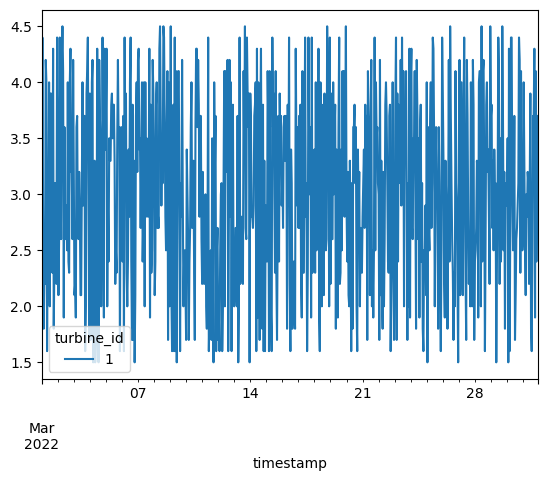

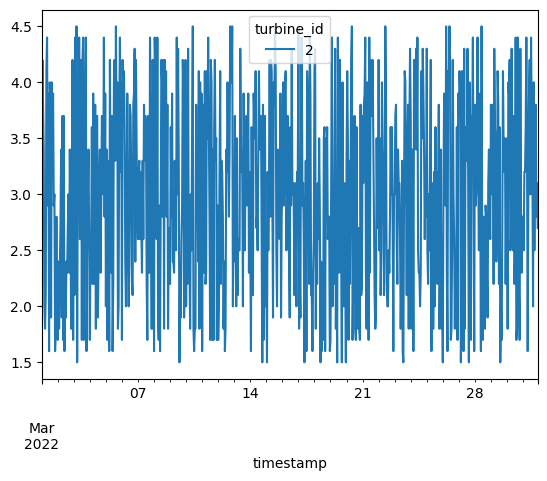

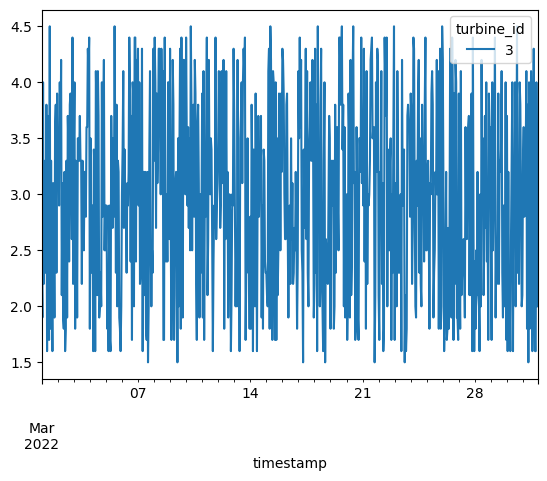

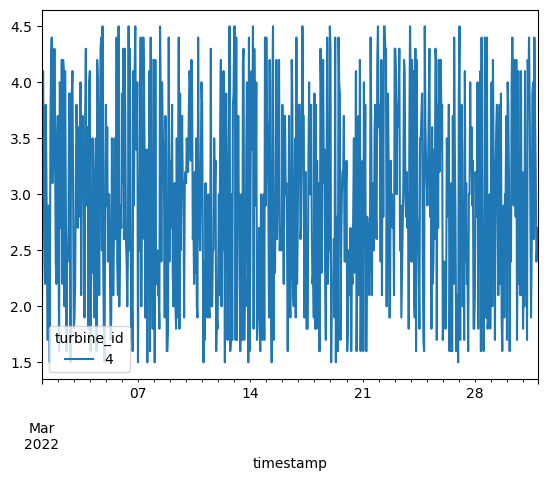

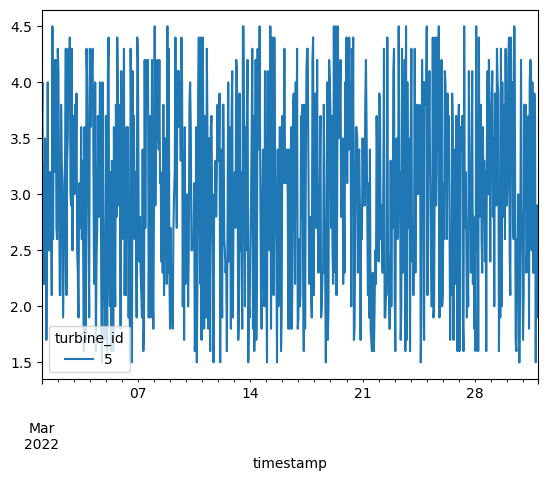

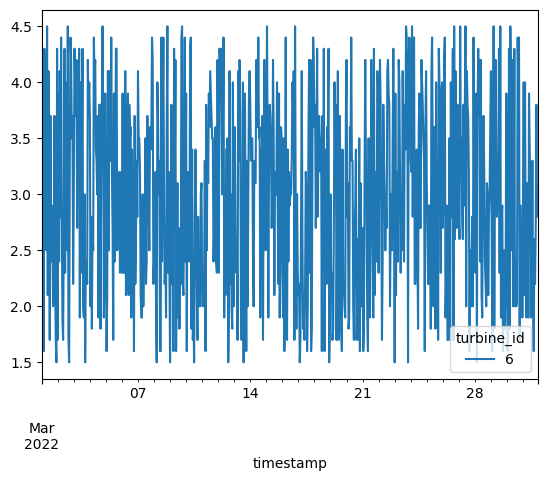

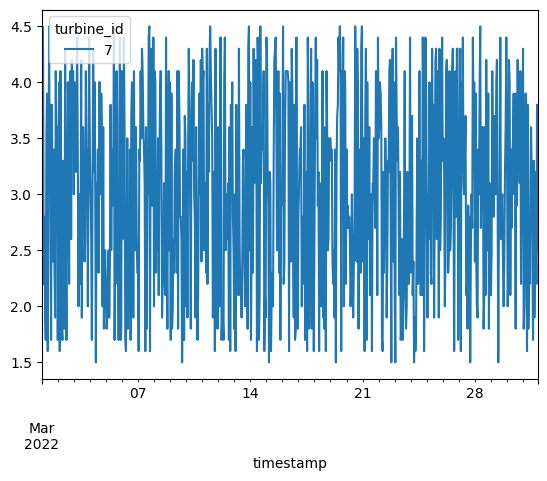

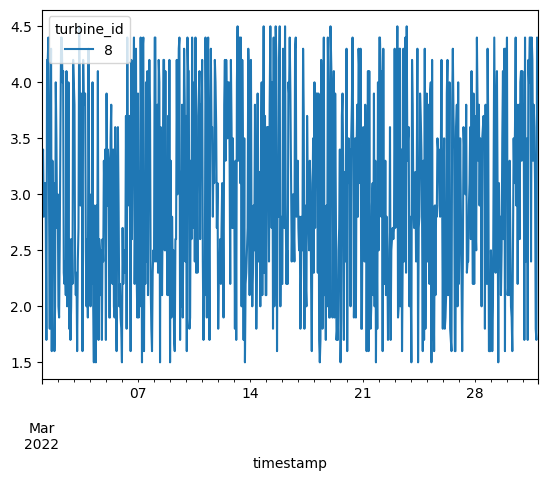

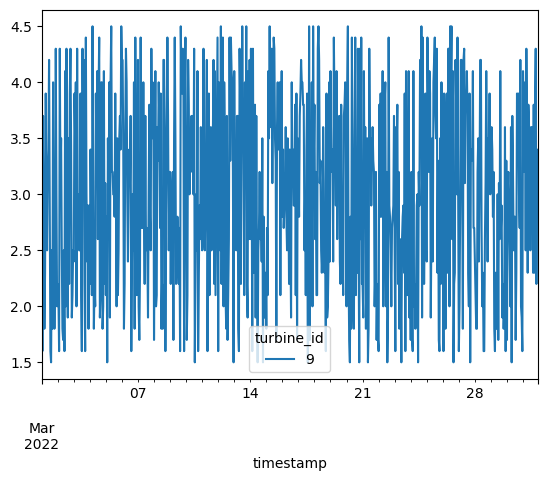

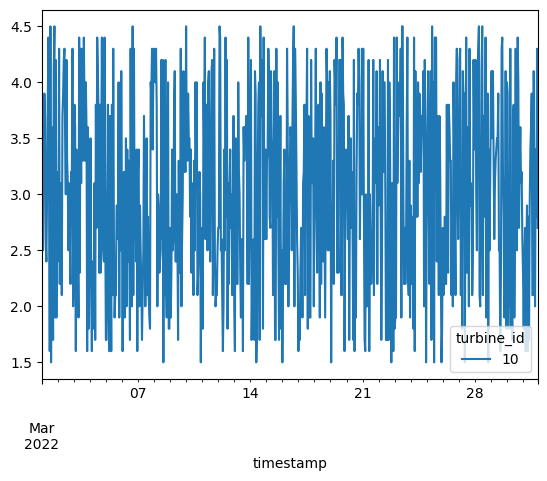

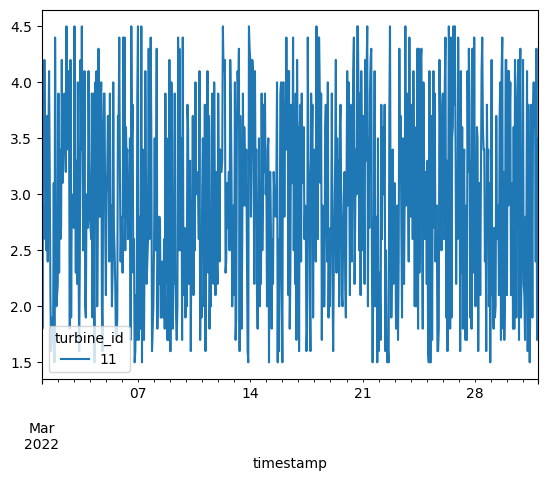

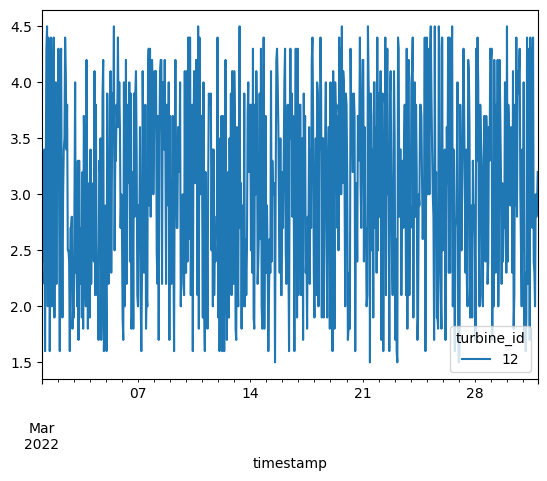

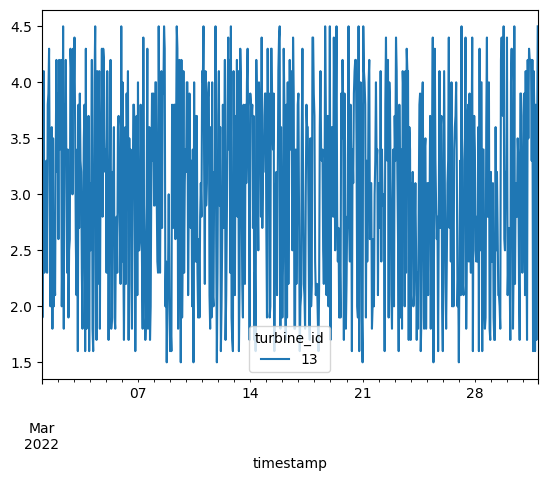

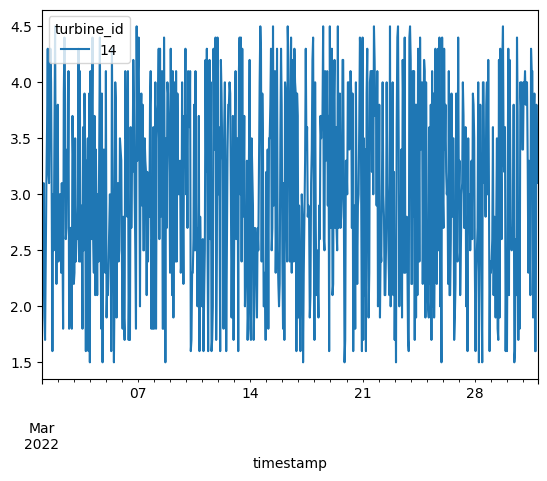

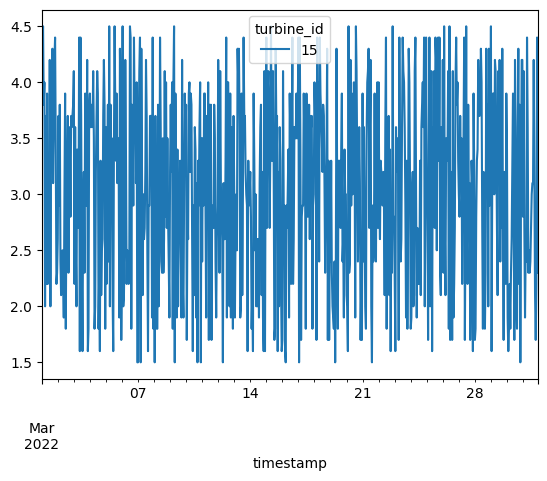

In [11]:
for turbine_id in list(silver_df["turbine_id"].unique()):
    silver_df[silver_df["turbine_id"] == turbine_id].pivot(index='timestamp', columns='turbine_id', values='power_output').plot()
    plt.show()

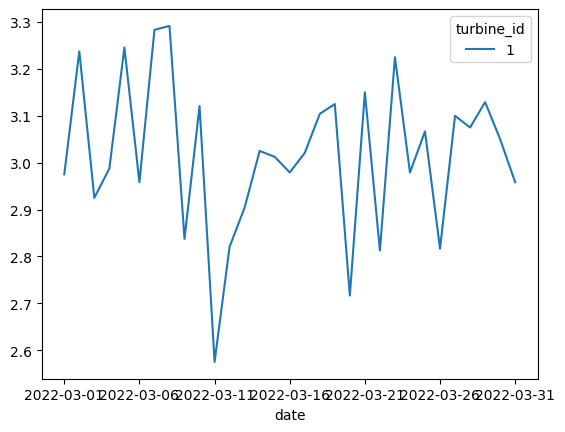

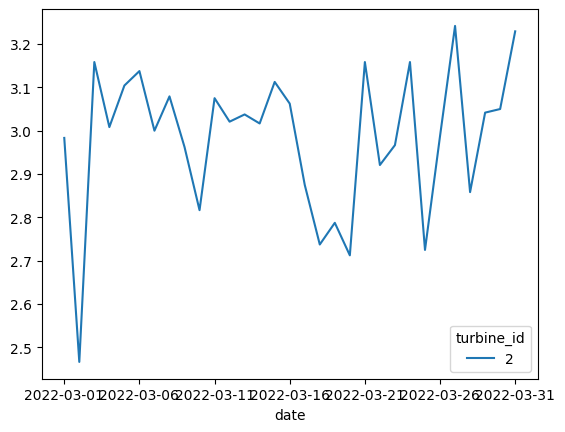

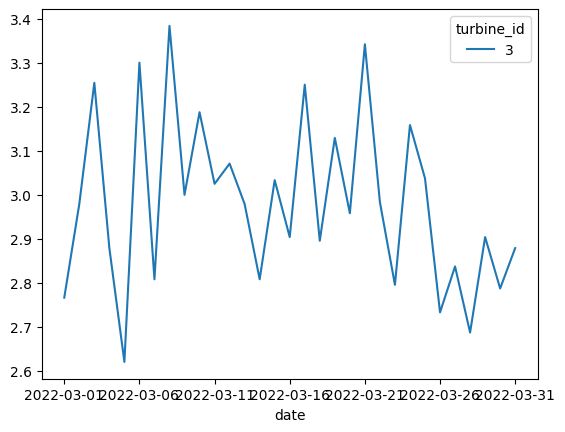

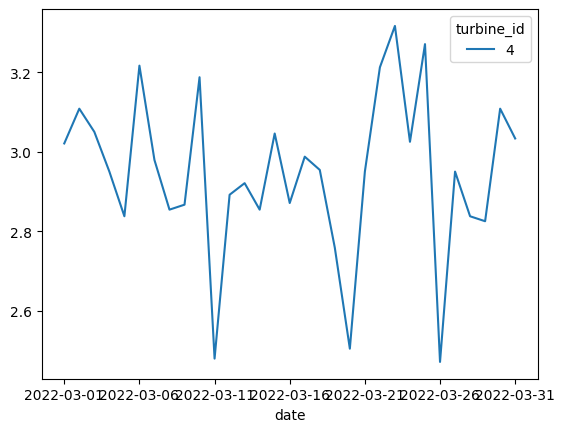

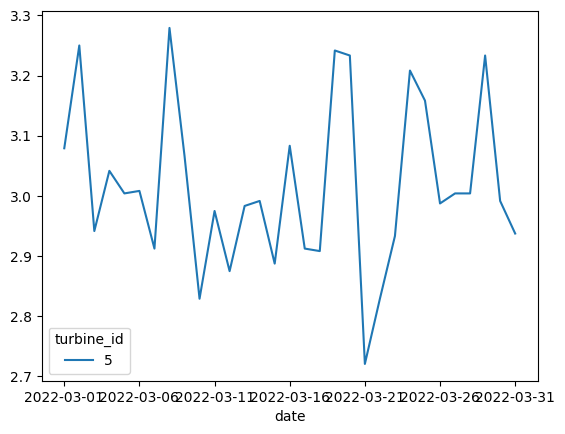

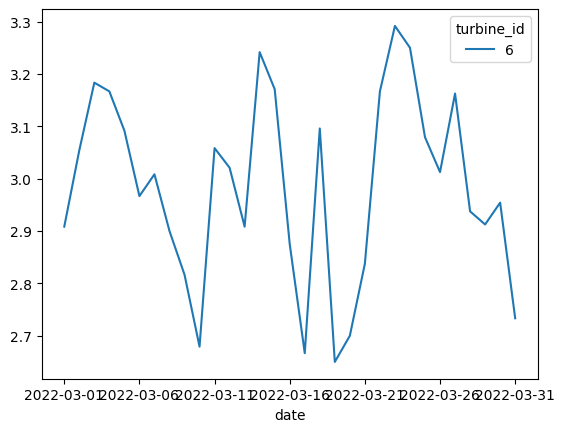

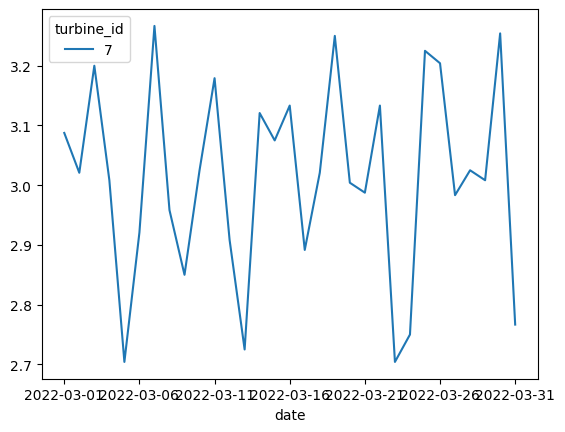

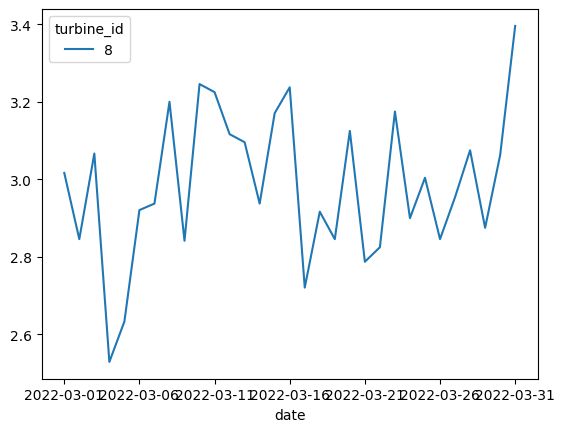

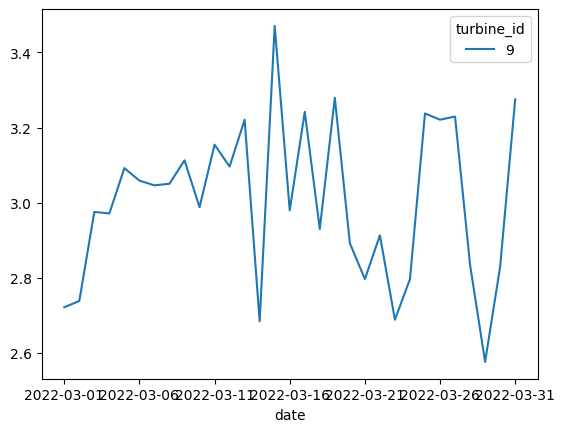

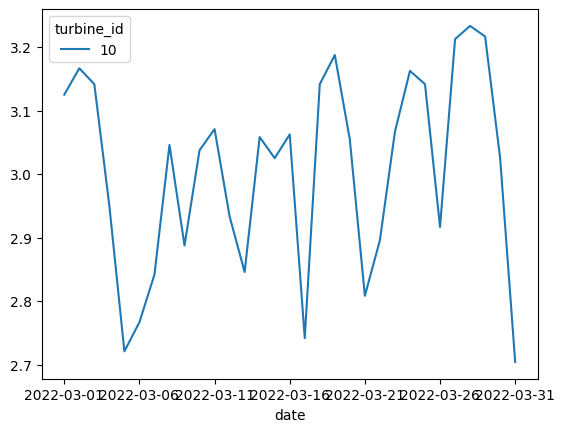

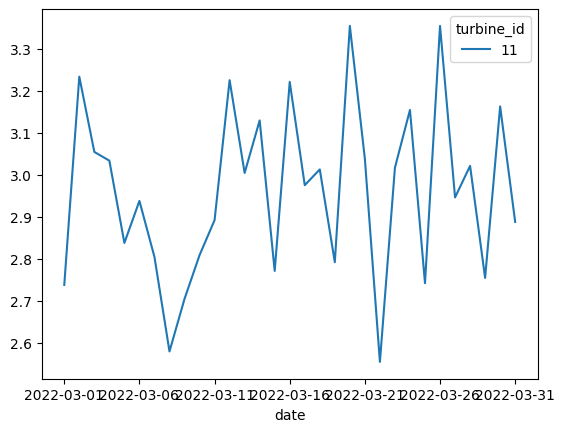

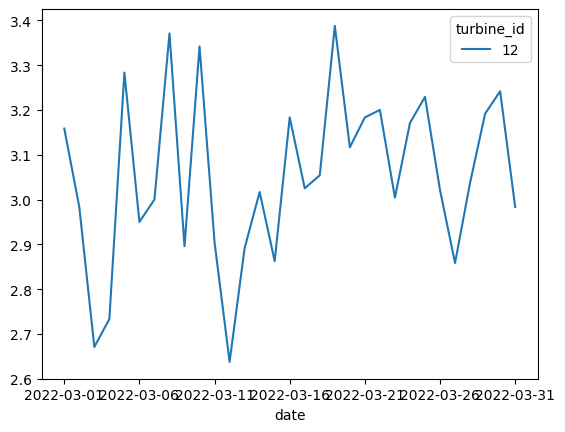

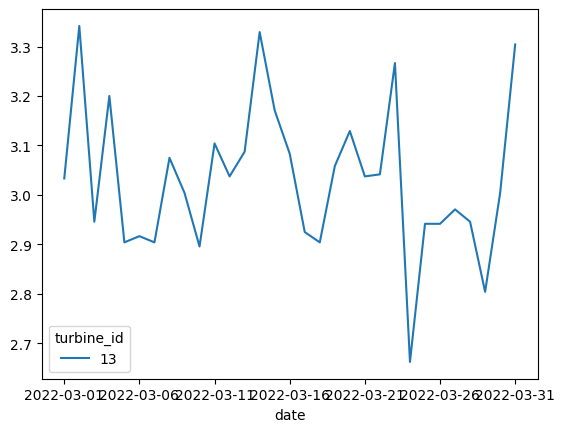

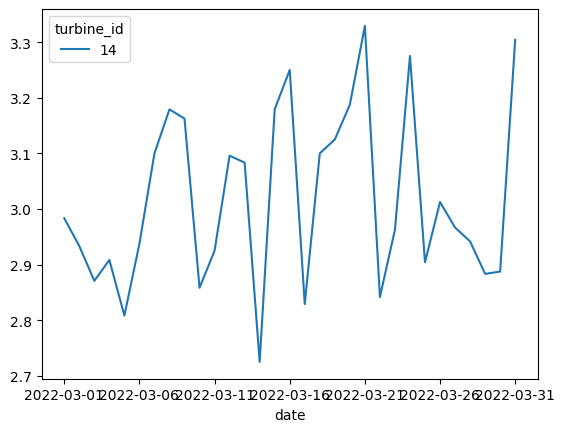

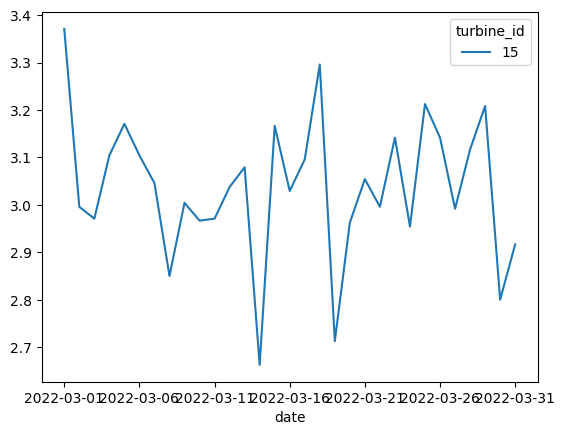

In [37]:
for turbine_id in list(silver_df["turbine_id"].unique()):
    silver_df[silver_df["turbine_id"] == turbine_id][["date", "turbine_id", "avg_power_output"]].drop_duplicates().pivot(index='date', columns='turbine_id', values='avg_power_output').plot()
    plt.show()

## Power output for an example turbine within a day

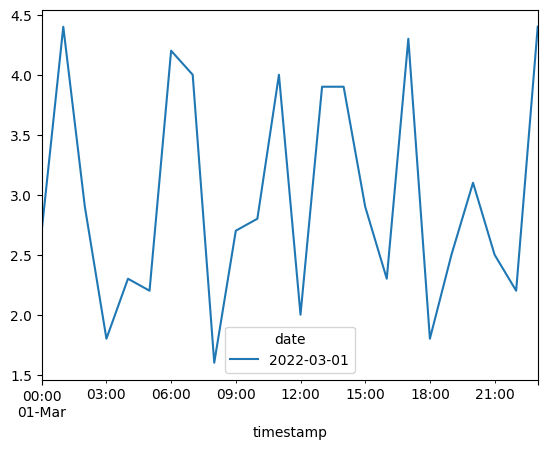

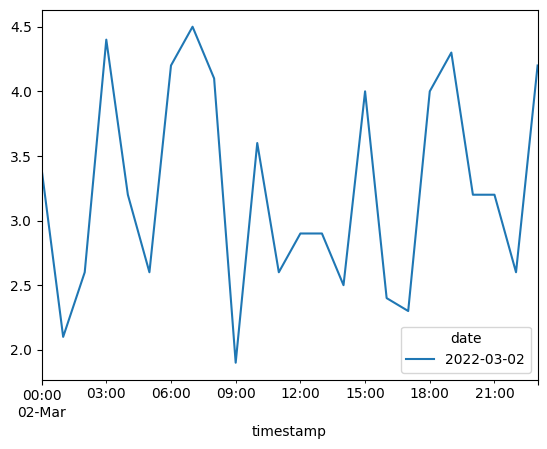

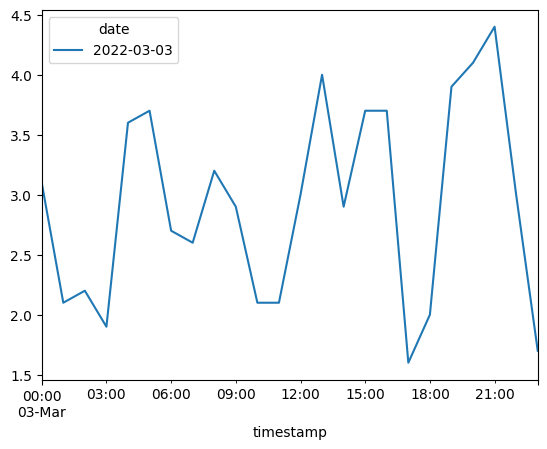

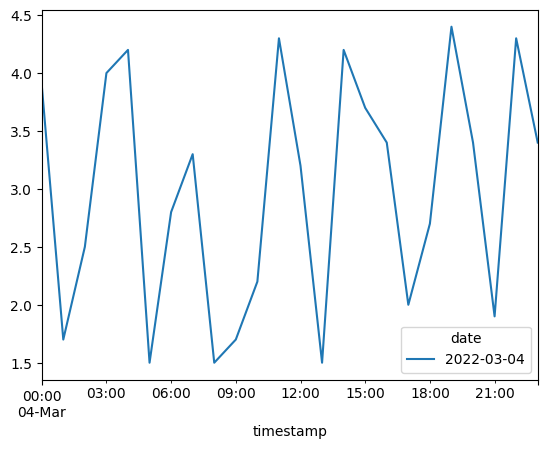

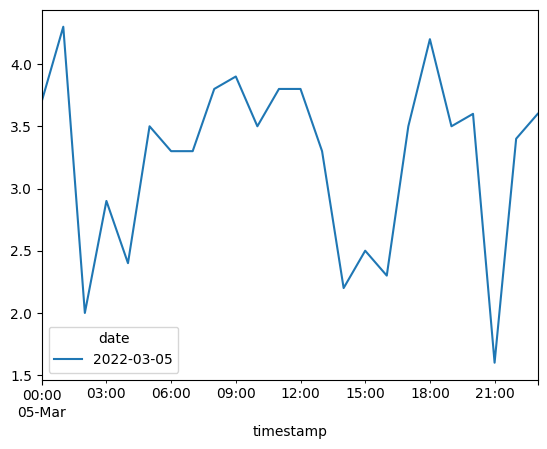

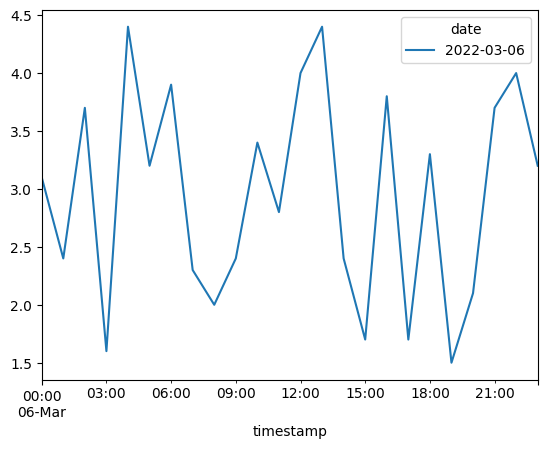

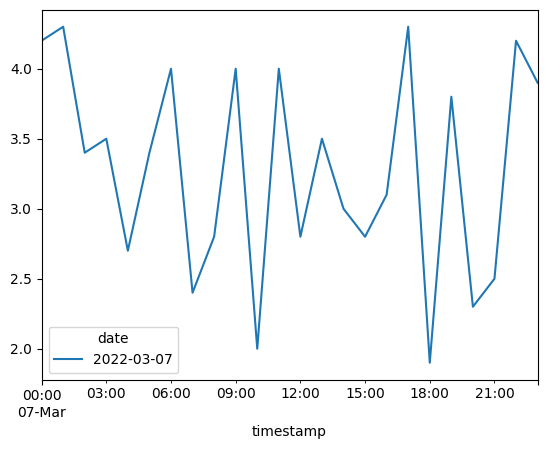

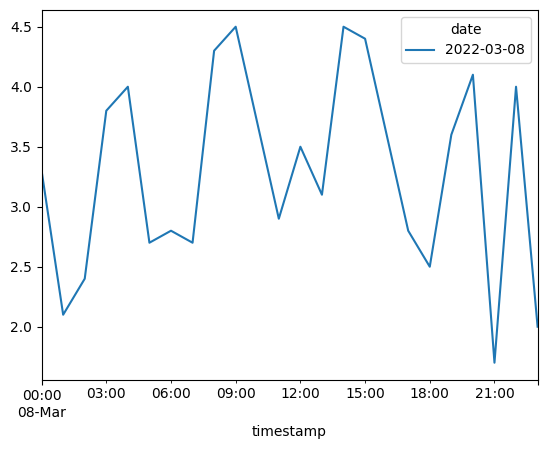

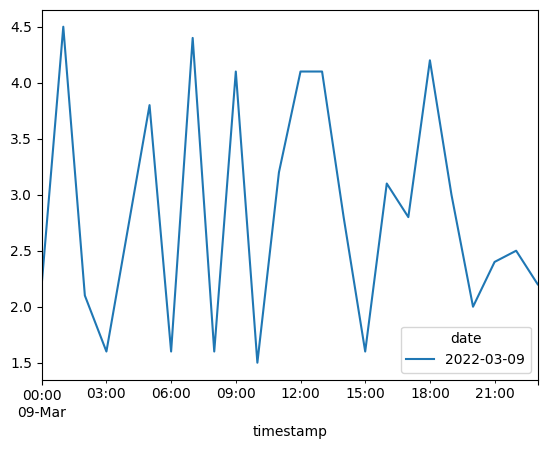

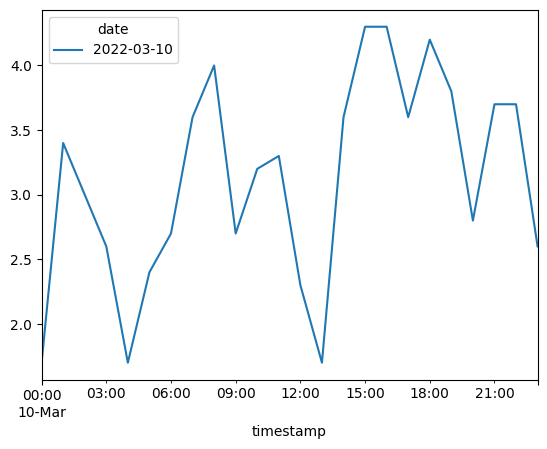

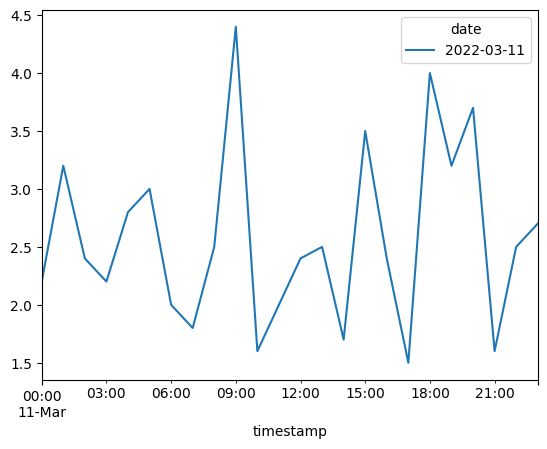

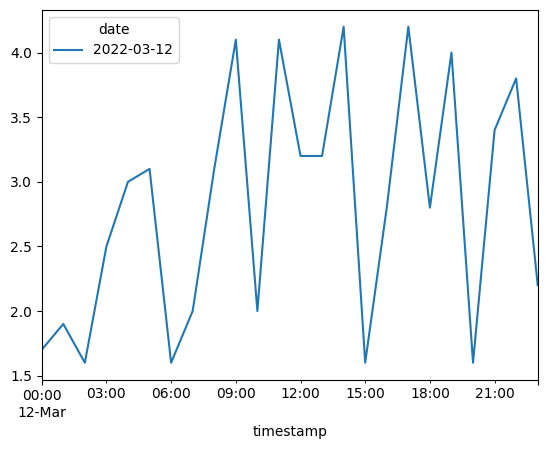

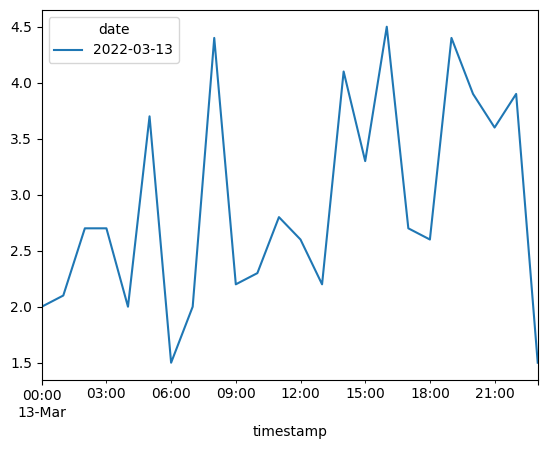

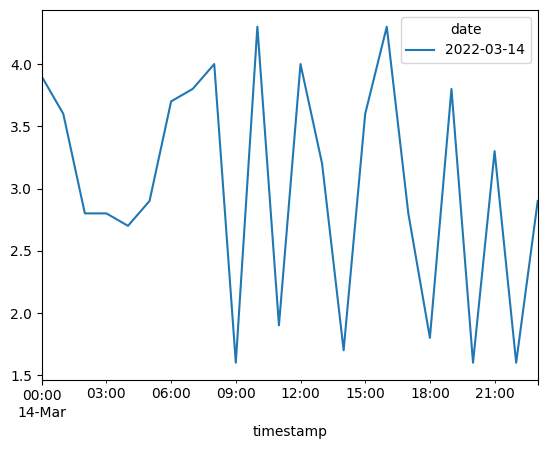

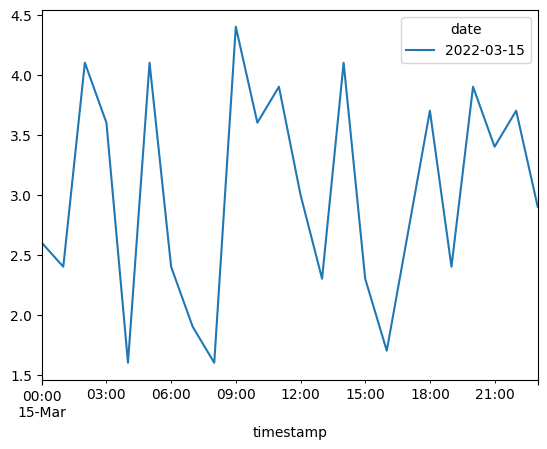

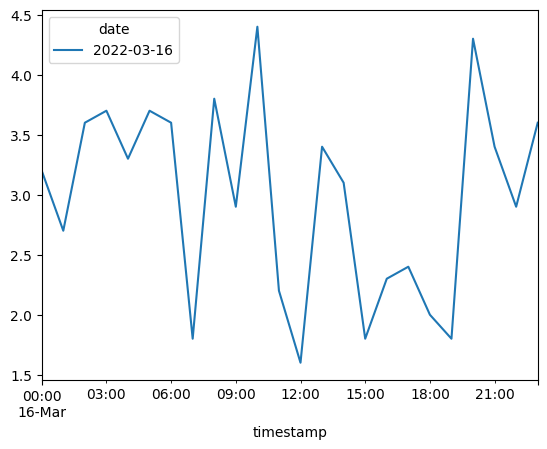

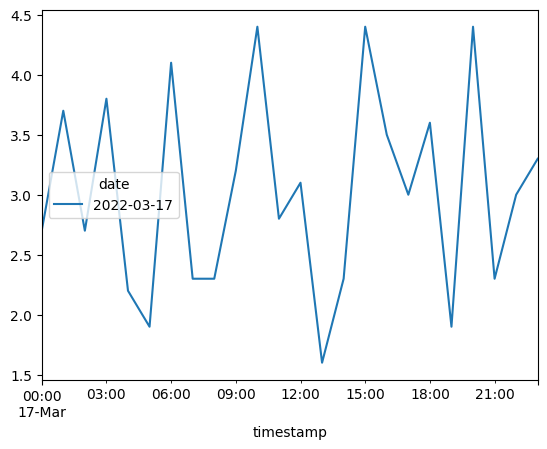

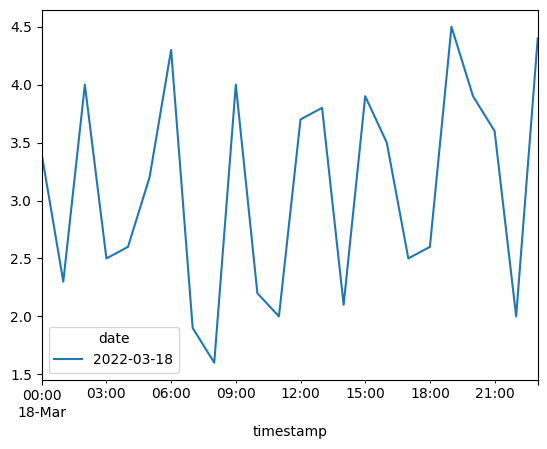

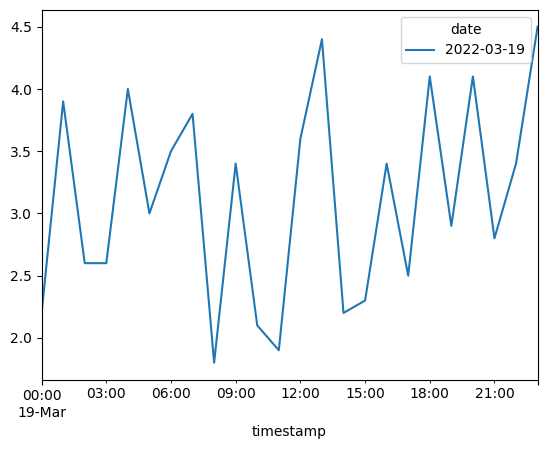

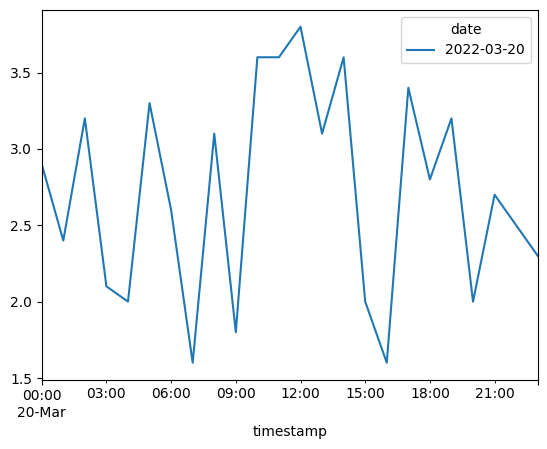

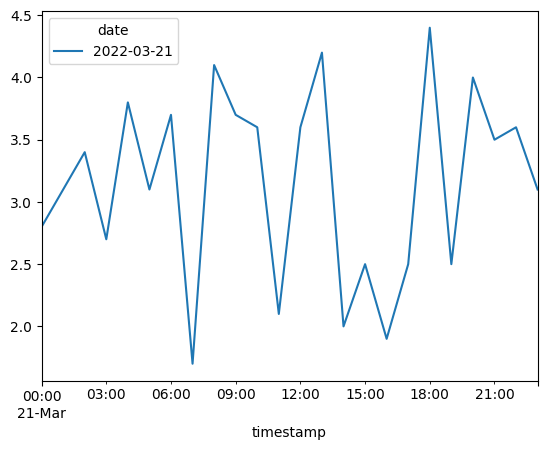

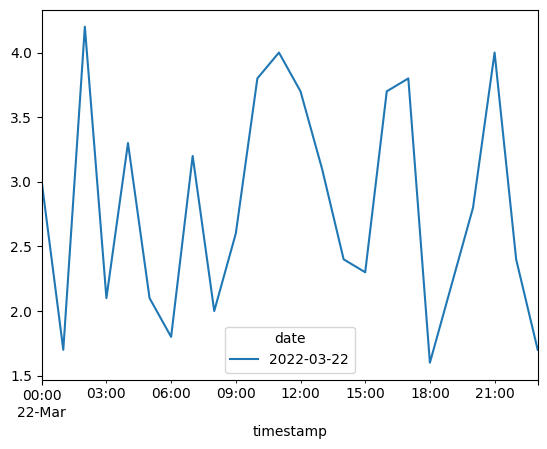

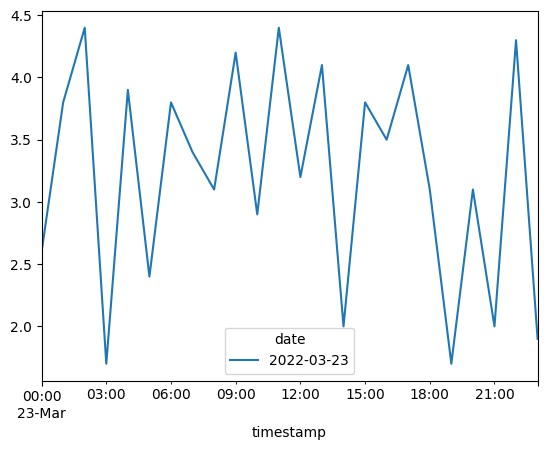

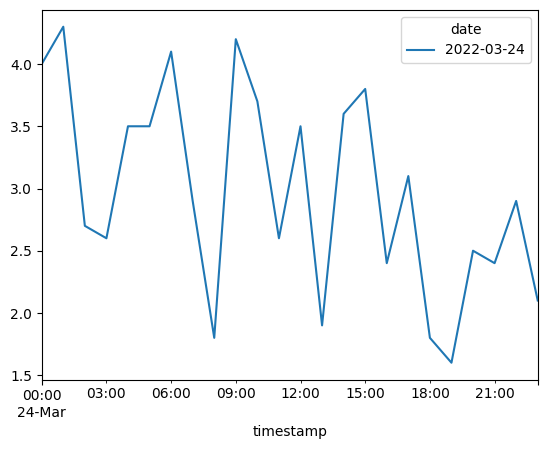

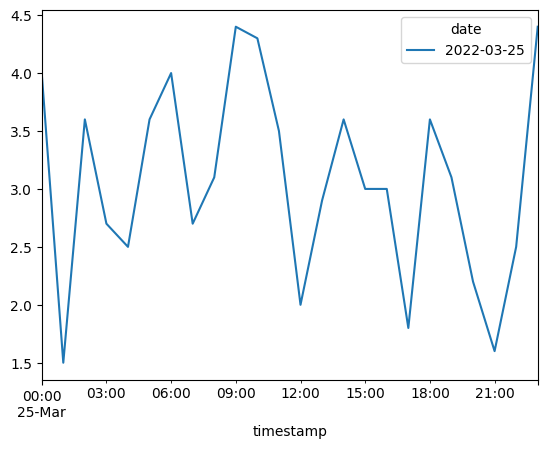

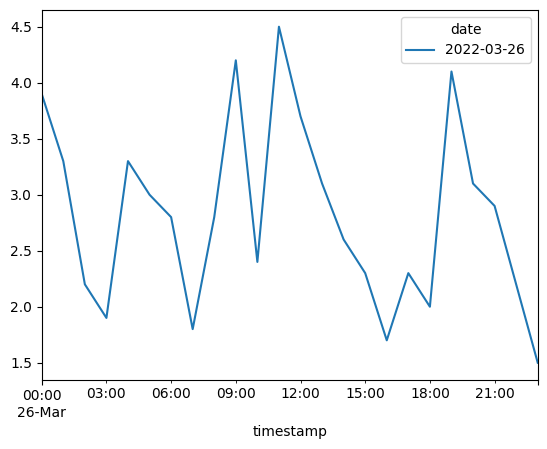

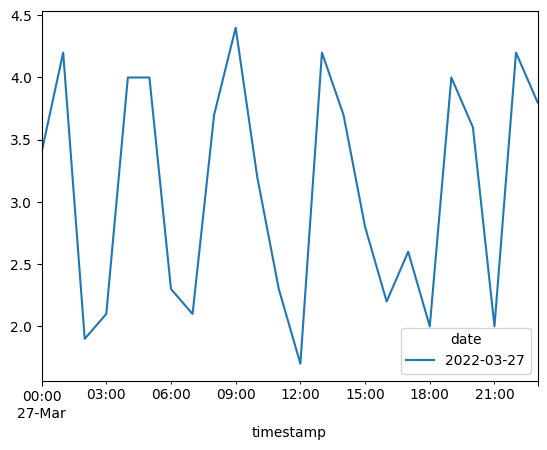

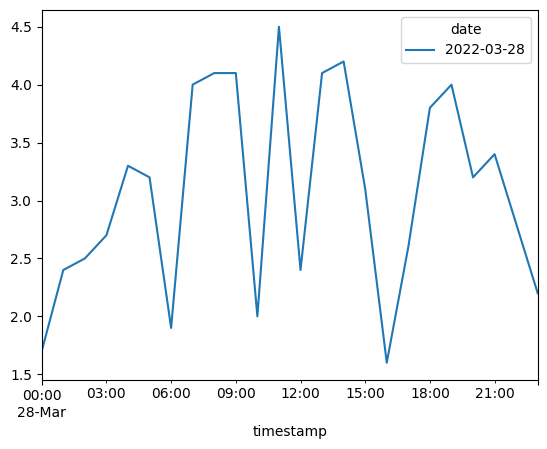

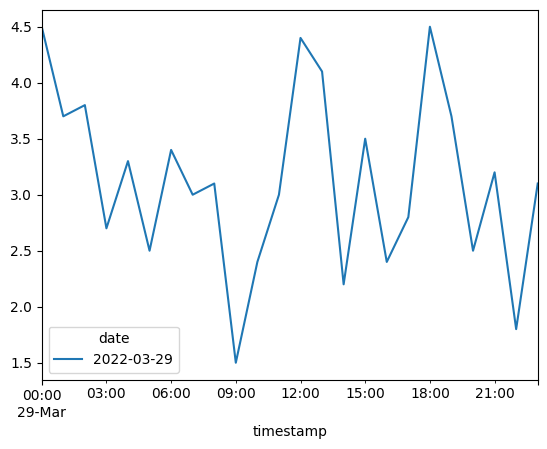

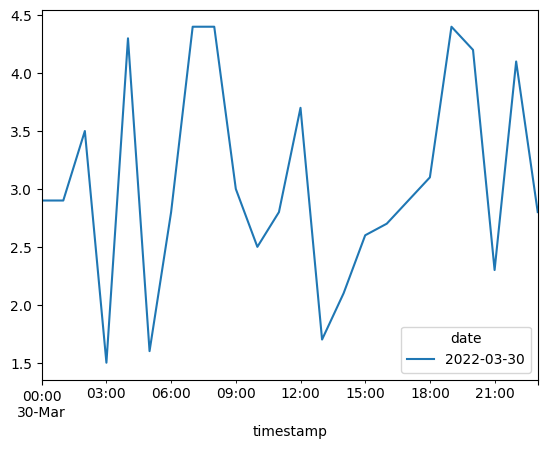

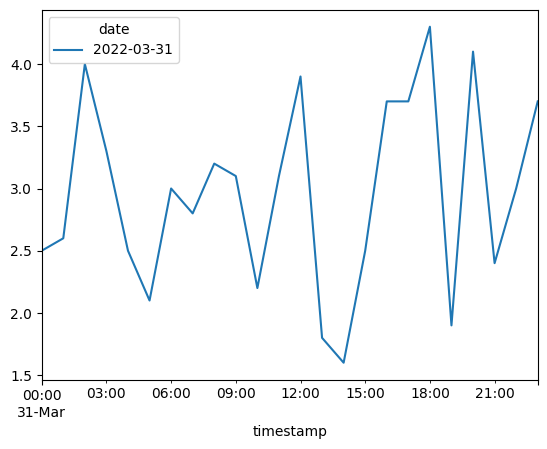

In [75]:
for date in list(silver_df["date"].unique()):
    silver_df[(silver_df["date"] == date) & (silver_df["turbine_id"] == 1)].pivot(index='timestamp', columns='date', values='power_output').plot()
    plt.show()

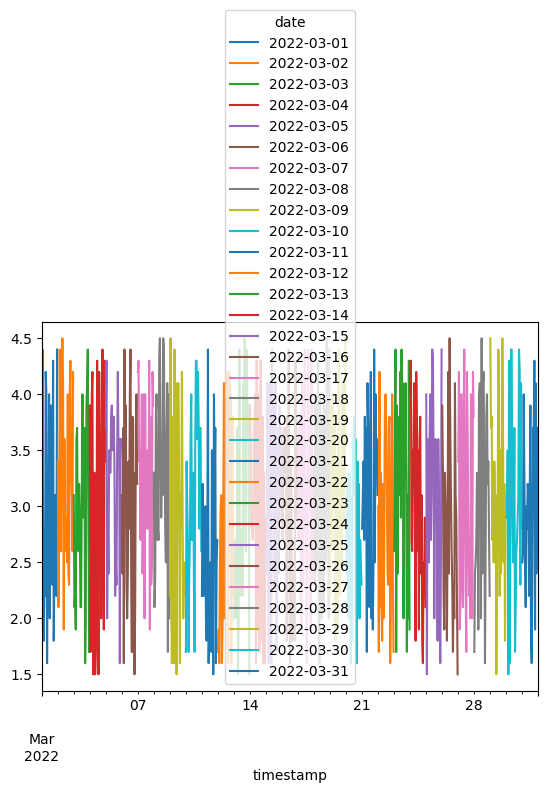

In [76]:
silver_df[(silver_df["turbine_id"] == 1)].pivot(index='timestamp', columns='date', values='power_output').plot()
plt.show()

## Measurement relationships

In [13]:
! pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


### Correlations



In [23]:
silver_df[['wind_speed', 'wind_direction', 'power_output']].corr()

,wind_speed,wind_direction,power_output
wind_speed,1.000000,0.000500,-0.002665
wind_direction,0.000500,1.000000,0.008175
power_output,-0.002665,0.008175,1.000000


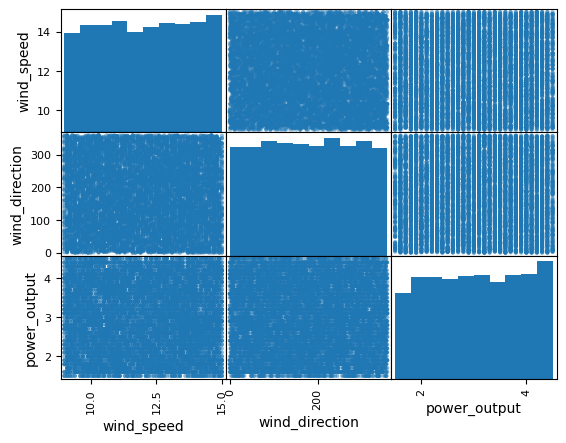

In [22]:
pd.plotting.scatter_matrix(silver_df[['wind_speed', 'wind_direction', 'power_output']])
plt.show()

### Regression

In [40]:
! pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 7.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.5/38.5 MB 4.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [62]:
X = silver_df[["wind_speed", "wind_direction"]]
y = silver_df["power_output"]

In [63]:
regr = model.fit(X, y=y)

In [65]:
regr.coef_

array([-1.24744772e-03,  6.19053998e-05])

In [66]:
regr.score(X, y=y)

6.0289296602400455e-05

In [73]:
y_fit = regr.predict(X)

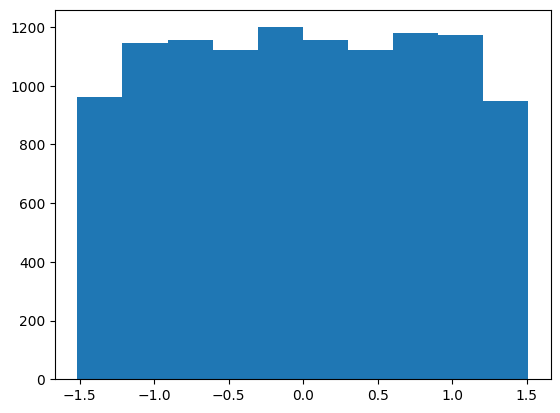

In [74]:
plt.hist((y - y_fit))
plt.show()

## Outliers

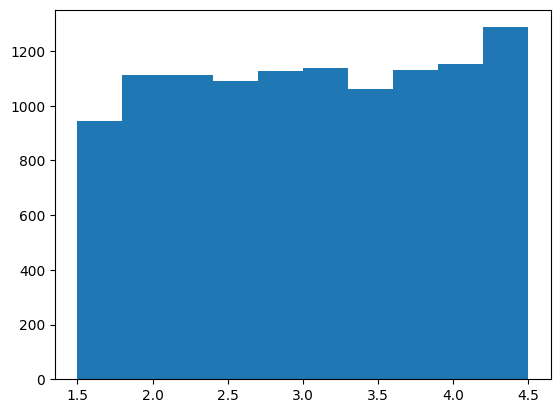

In [78]:
plt.hist(silver_df["power_output"])
plt.show()